#Wind Power Generation Forecasting

    

In [2]:
pip install panadas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
location1 = pd.read_csv('Location1.csv')
location2 = pd.read_csv('Location2.csv')
location3 = pd.read_csv('Location3.csv')
location4 = pd.read_csv('Location4.csv')

In [5]:
location1.head()


,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [6]:
location1['Location'] = 'Location1'
location2['Location'] = 'Location2'
location3['Location'] = 'Location3'
location4['Location'] = 'Location4'

merged_data=pd.concat([location1,location2,location3,location4],ignore_index=True) 
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1


In [7]:
merged_data.to_csv('merged_locations.csv',index=False)

In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [9]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,46.655994,22.012738,-31.2,30.2000,46.9000,65.3000,101.7000
relativehumidity_2m,175200.0,70.155291,17.326678,9.0,57.0000,72.0000,84.0000,100.0000
dewpoint_2m,175200.0,36.516241,20.933153,-36.2,21.9000,36.2000,54.6000,78.7000
windspeed_10m,175200.0,4.157639,2.012682,0.0,2.6300,3.8500,5.3800,18.5300
windspeed_100m,175200.0,6.879334,3.043964,0.0,4.7000,6.6800,8.8000,24.5900
winddirection_10m,175200.0,201.589446,99.639040,1.0,130.0000,211.0000,288.0000,360.0000
winddirection_100m,175200.0,201.539070,100.683777,0.0,129.0000,211.0000,290.0000,360.0000
windgusts_10m,175200.0,8.038205,3.617488,0.5,5.3000,7.6000,10.3000,29.2000
Power,175200.0,0.303429,0.257325,0.0,0.0877,0.2331,0.4742,0.9994


In [10]:
merged_data.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

In [11]:
merged_data.duplicated().sum()

0

In [12]:
import pandas as pd
merged_data = pd.read_csv('merged_locations.csv')
merged_data = pd.get_dummies(merged_data,columns=['Location'],drop_first=True)

merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


In [13]:
merged_data.columns

                 

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location_Location2',
       'Location_Location3', 'Location_Location4'],
      dtype='object')

In [14]:
merged_data.drop('Time', axis=1,inplace=True)

In [15]:
merged_data.head(100)

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.7,71,-4.6,3.09,7.32,245,256,7.1,0.5284,False,False,False
96,1.8,71,-5.3,3.13,7.62,243,253,6.0,0.4857,False,False,False
97,1.3,72,-5.7,3.10,7.69,249,257,6.1,0.4430,False,False,False
98,0.7,71,-6.4,2.92,7.57,248,258,5.9,0.4003,False,False,False


WEEK 2: EDA


In [17]:
merged_data = pd.read_csv('merged_locations.csv')
numerical_columns = merged_data.select_dtypes(include=['number']).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power'],
      dtype='object')

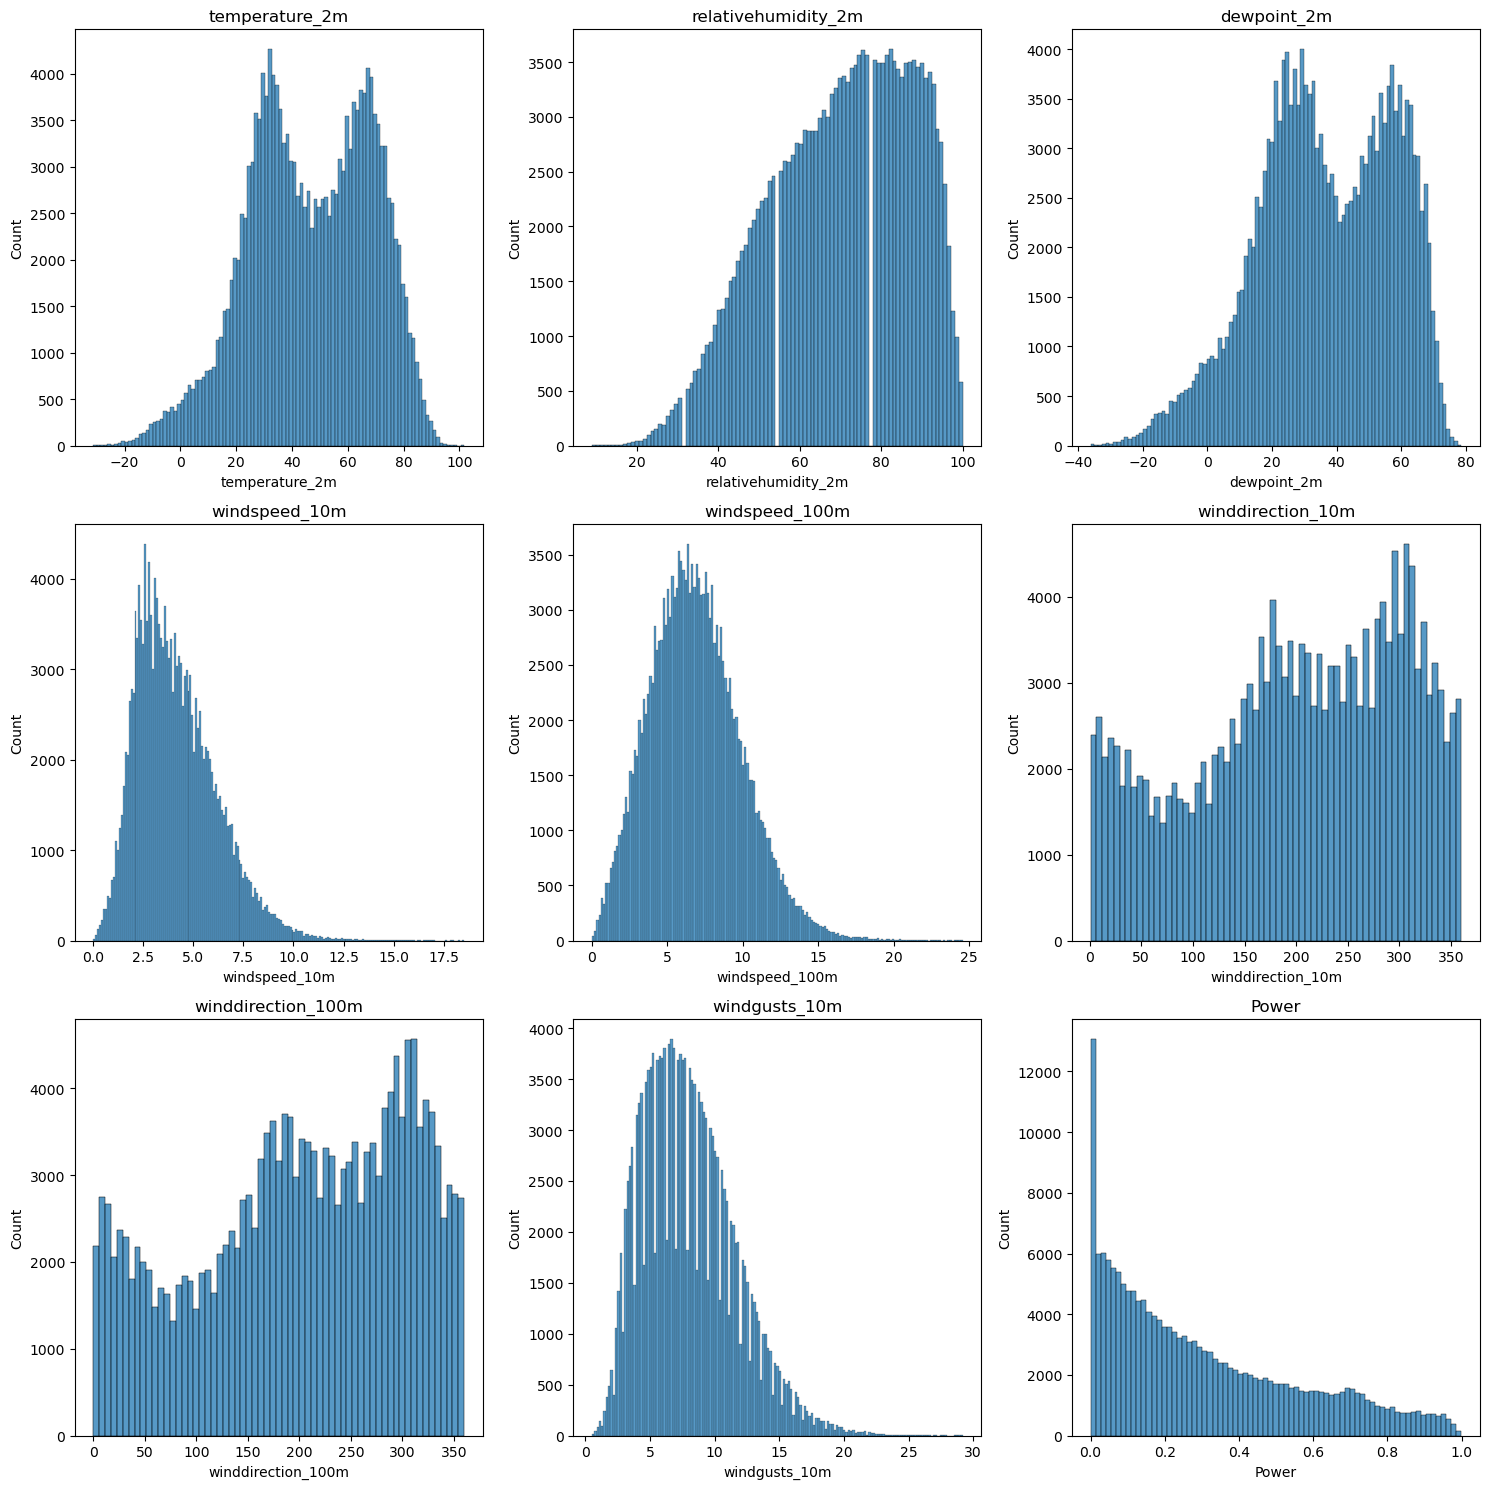

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes = plt.subplots(3,3,figsize=(15,15))
axes=axes.flatten()
for i,col in enumerate(numerical_columns):
    sns.histplot(merged_data[col],ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

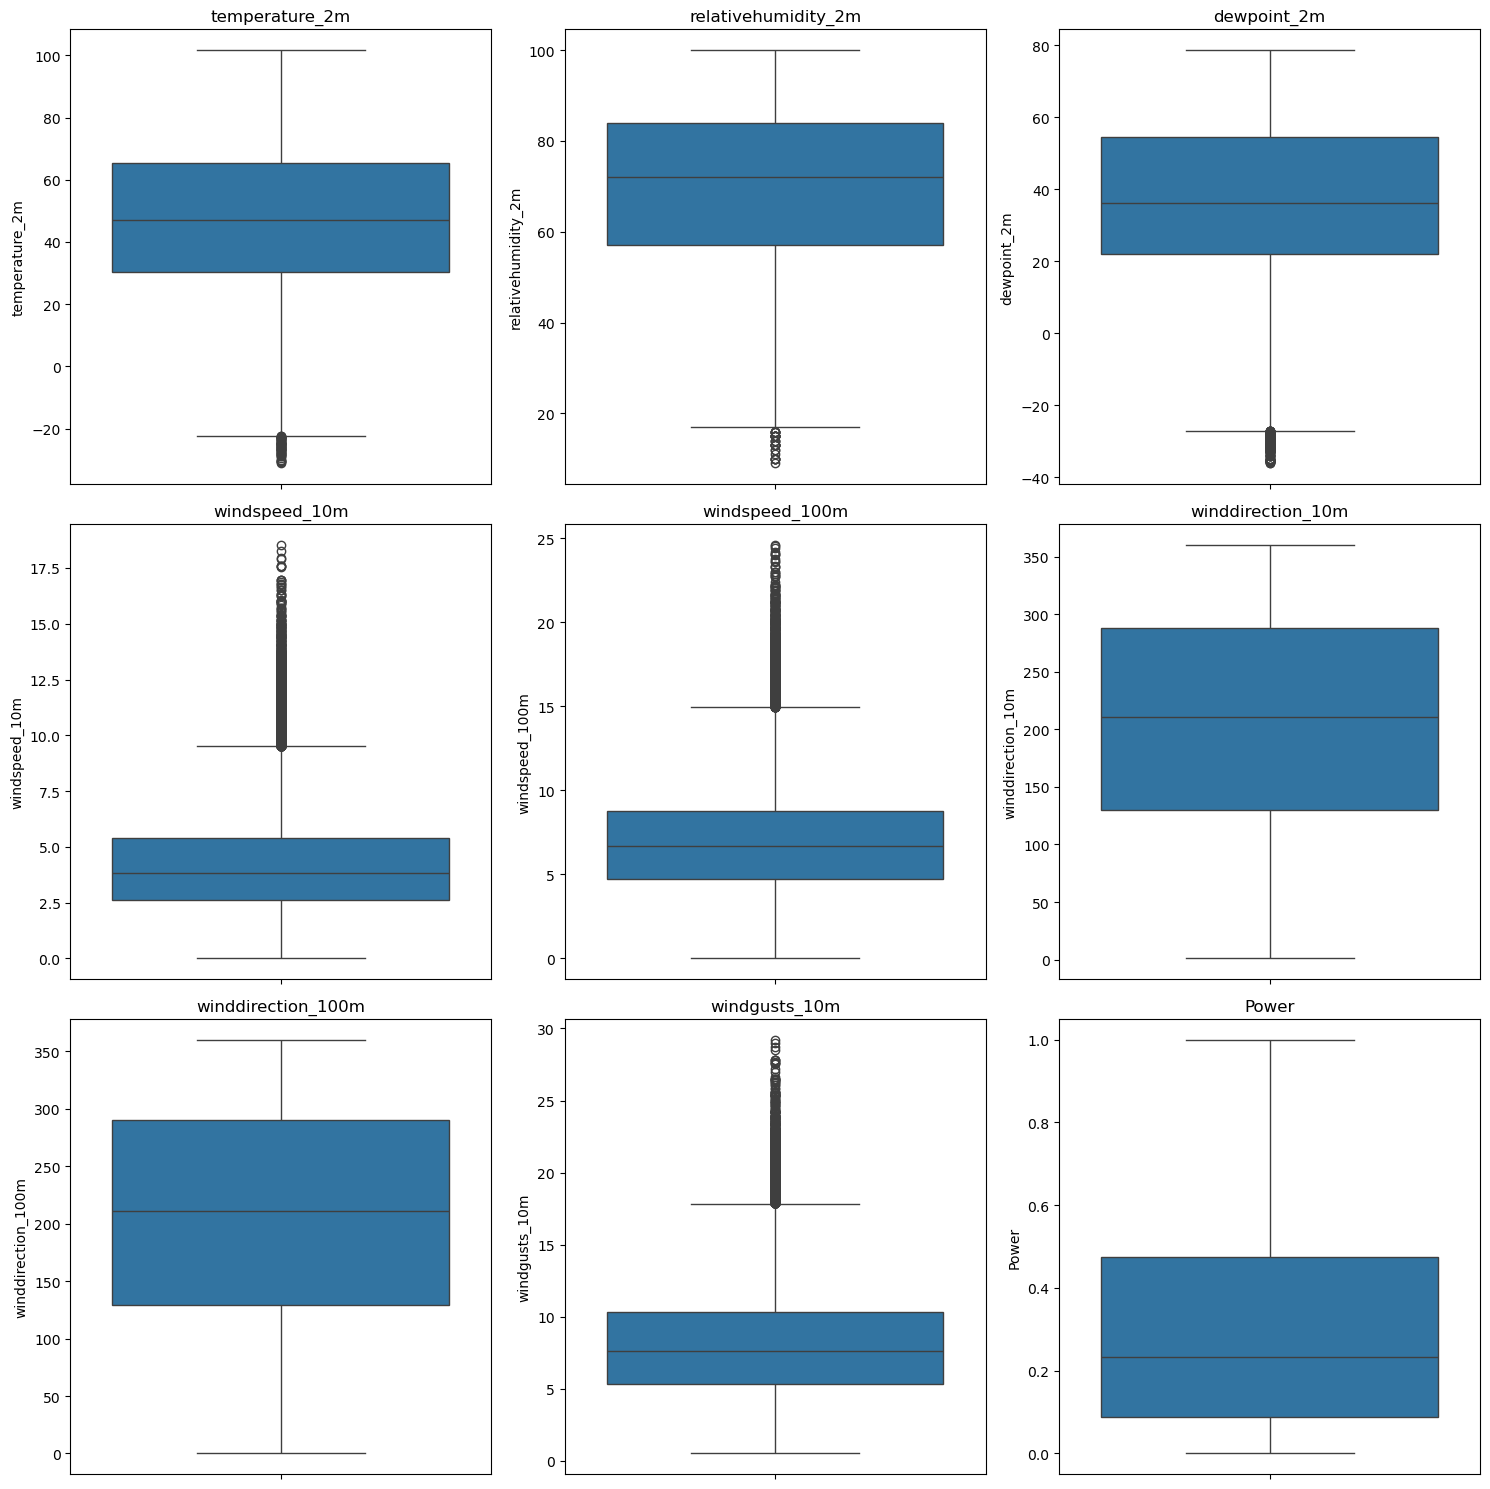

In [19]:
fig,axes=plt.subplots(3,3,figsize=(15,15))
axes=axes.flatten()
for i,col in enumerate(numerical_columns):
    sns.boxplot(merged_data[col],ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

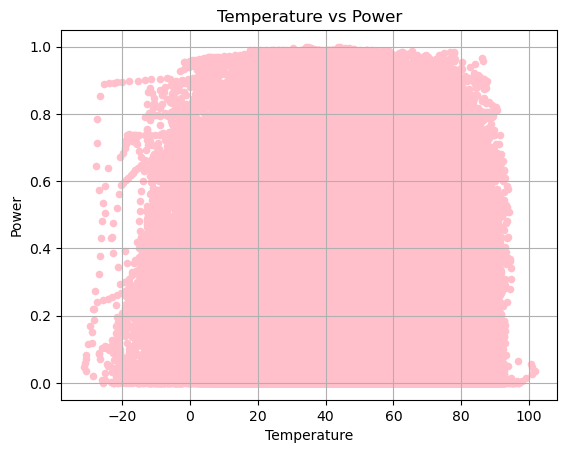

In [20]:
import matplotlib.pyplot as plt

# Assuming merged_data is already defined and contains 'temperature_2m' and 'power' columns
merged_data.plot.scatter(x='temperature_2m', y='Power', c='pink')

plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()


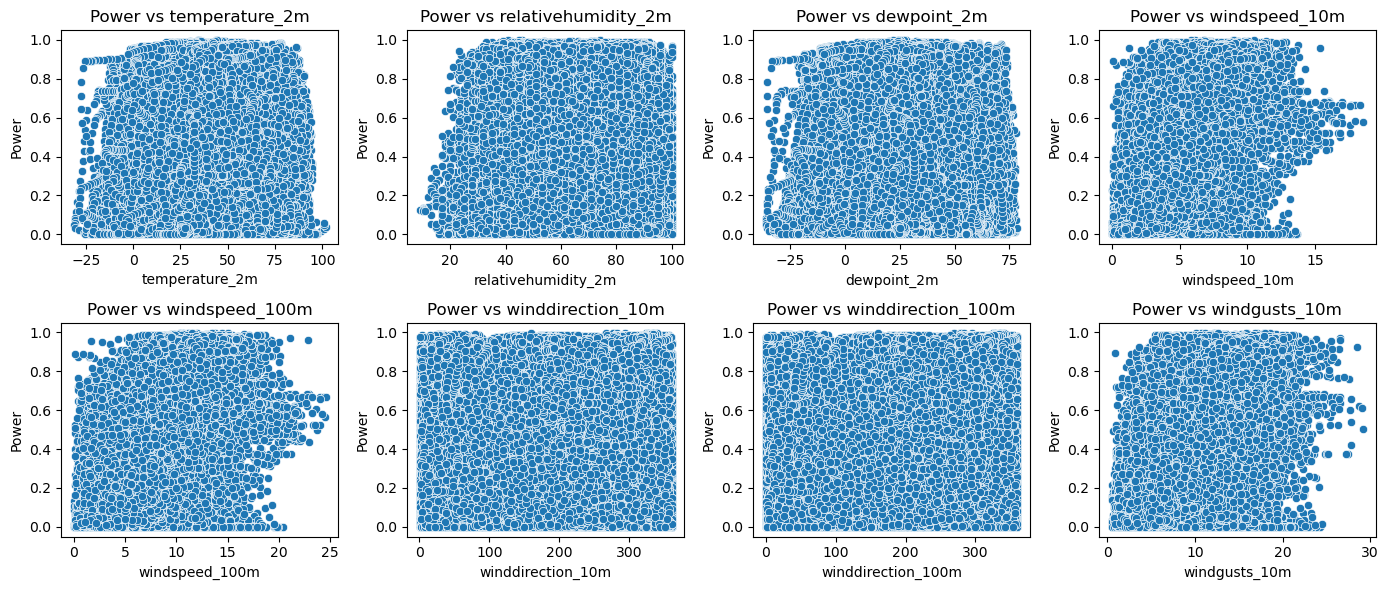

In [21]:
fig,axes = plt.subplots(2,4,figsize=(14,6))
axes=axes.flatten()
for i,col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col,y='Power',data=merged_data,ax=axes[i])
    axes[i].set_title(f'Power vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Power')
plt.tight_layout()
plt.show()

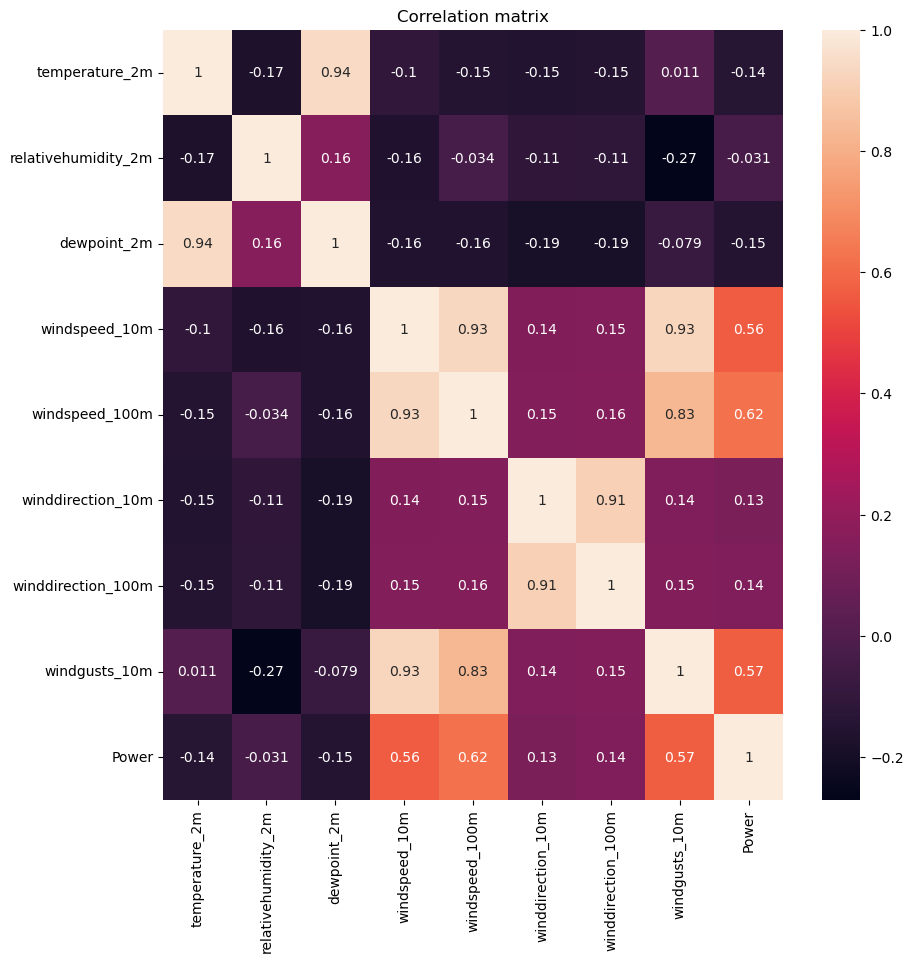

In [22]:
correlation = merged_data[numerical_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)
plt.title('Correlation matrix')
plt.show()

WEEK 3: DATA MODELLING AND EVALUATION

In [53]:
x = merged_data.drop('Power', axis=1)  # Features
y = merged_data['Power']              # Target



In [55]:
#split the data into training and test set

x_train , x_test , y_train , y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 2. Initialize the StandardScaler
scaler = StandardScaler()

# 3. Fit on training data and transform both training and test sets
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [63]:
print(x.dtypes)



Time                    object
temperature_2m         float64
relativehumidity_2m      int64
dewpoint_2m            float64
windspeed_10m          float64
windspeed_100m         float64
winddirection_10m        int64
winddirection_100m       int64
windgusts_10m          float64
Location                object
dtype: object


In [65]:
x['Time'] = pd.to_datetime(x['Time'])
x['hour'] = x['Time'].dt.hour
x['dayofweek'] = x['Time'].dt.dayofweek
x = x.drop('Time', axis=1)


In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Location'] = le.fit_transform(x['Location'])


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 2. Initialize the StandardScaler
scaler = StandardScaler()

# 3. Fit on training data and transform both training and test sets
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [75]:
# Train with Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# initialize the model
model = LinearRegression()
# Train the model
model.fit(x_train, y_train)

LinearRegression()

In [79]:
# Make the predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R Squared Score: {r2}')

Mean Absolute Error: 0.14504506991617075
Mean Squared Error: 0.035917435887092466
R Squared Score: 0.46226940825886986


In [87]:
# Train using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the RF Model
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [102]:
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RF MAE: {mae_rf}')
print(f'RF MSE: {mse_rf}')
print(f'RF R2 Score: {r2_rf}')

RF MAE: 0.10081942639840183
RF MSE: 0.019368697878515553
RF R2 Score: 0.7100254760888376


In [97]:
# Train using XGBoost Regressor Model
!pip install xgboost


from xgboost import XGBRegressor
# Initialize the model
xgb_model = XGBRegressor()
# Train the model
xgb_model.fit(x_train, y_train)

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 17.5 MB/s eta 0:00:09
   ---------------------------------------- 1.6/150.0 MB 6.0 MB/s eta 0:00:25
    --------------------------------------- 2.1/150.0 MB 4.3 MB/s eta 0:00:35
    --------------------------------------- 2.9/150.0 MB 3.9 MB/s eta 0:00:38
    --------------------------------------- 3.1/150.0 MB 3.4 MB/s eta 0:00:43
    --------------------------------------- 3.4/150.0 MB 3.1 MB/s eta 0:00:47
   - -------------------------------------- 4.2/150.0 MB 3.1 MB/s eta 0:00:48
   - -------------------------------------- 5.0/150.0 MB 3.1 MB/s eta 0:00:47
   - -------------------------------------- 5.5/150.0 MB 3.1 MB/s eta 0:00:47
   - -------------------------------------- 6.0/150.0 MB 3.1 MB/s eta 0:00:47
   - -------------------------------------- 6.6/150.0 MB 3.0 MB/s eta 0:00:48
   - -------------------------------------- 6.8/150.0 MB 3.0 MB/s eta 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

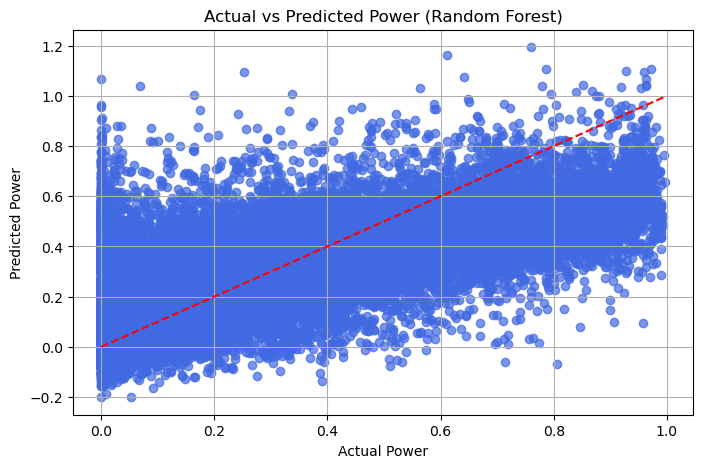

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Actual vs Predicted Power (Random Forest)')
plt.grid(True)
plt.show()


In [98]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Use MAE for evaluation
    cv=3,  # 3-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the GridSearchCV
grid_search.fit(x_train, y_train)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best MAE: {-grid_search.best_score_}')

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(x_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Tuned Model Mean Absolute Error (MAE): {mae_tuned}')
print(f'Tuned Model Mean Squared Error (MSE): {mse_tuned}')
print(f'Tuned Model R^2 Score: {r2_tuned}')

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best MAE: 0.10954931304967741
Tuned Model Mean Absolute Error (MAE): 0.10761020202046892
Tuned Model Mean Squared Error (MSE): 0.02196940924725623
Tuned Model R^2 Score: 0.6710894543845883


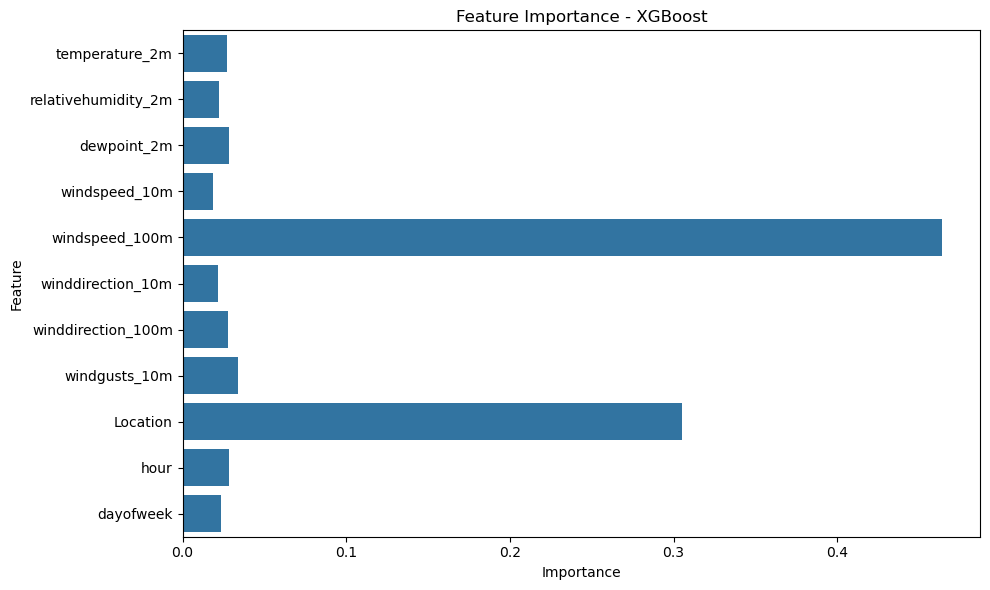

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names from original unscaled data
feature_names = x.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=best_model.feature_importances_, y=feature_names)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

